In [504]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from imutils.perspective import four_point_transform
from imutils import contours
import imutils
import pandas as pd

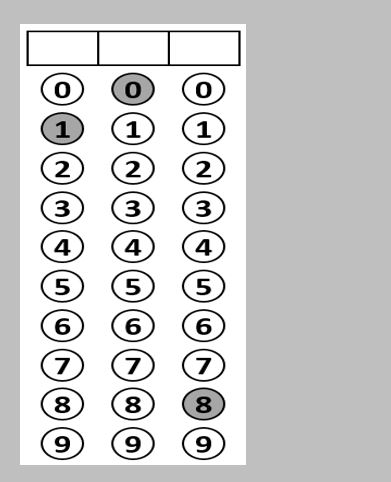

In [505]:
# Membaca gambar lembar jawaban
image = cv2.imread('tes_omr.png')
cv2_imshow(image)

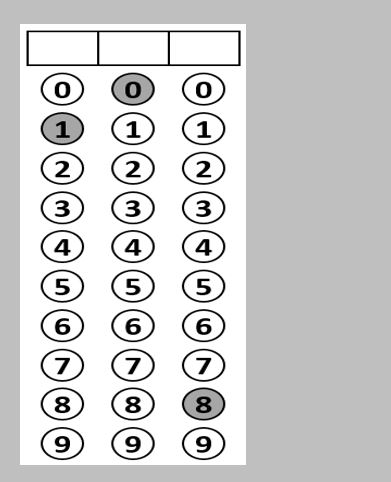

In [506]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

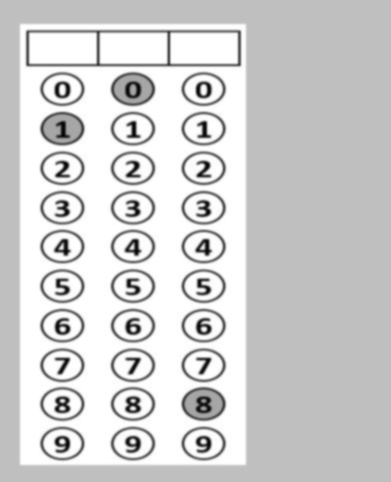

In [507]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
cv2_imshow(blurred)

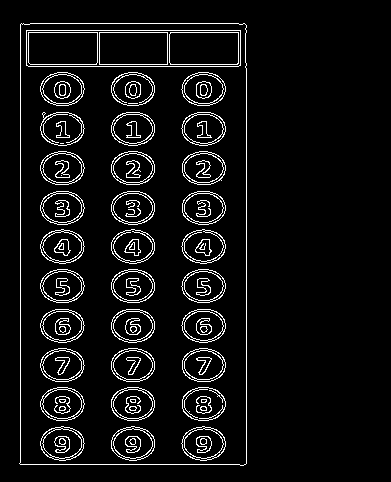

In [508]:
# Menggunakan metode canny edge detection
edged = cv2.Canny(gray, 30, 200)
cv2_imshow(edged)

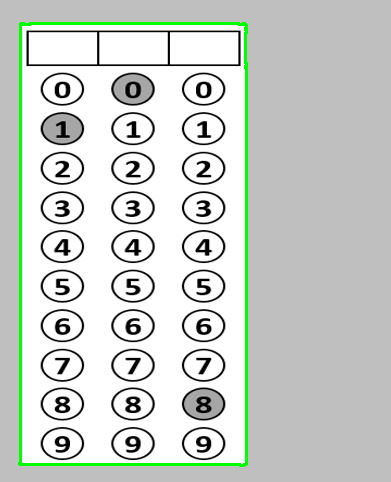

In [509]:
contours_paper, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, contours_paper, -1, (0, 255, 0), 2)
# Menampilkan gambar dengan OpenCV imshow()

cv2_imshow(image)

In [510]:
# Inisialisasi list untuk menyimpan string kontur
contour_strings_paper = []

# Ubah setiap kontur menjadi string dan tambahkan ke list
for con_paper in contours_paper:
    contour_str_paper = str(con_paper.squeeze().tolist())
    contour_strings_paper.append(contour_str_paper)

# Buat DataFrame dari list kontur
df_kontur_1 = pd.DataFrame(contour_strings_paper, columns=['Contour'])

# Tampilkan DataFrame
df_kontur_1

,Contour
0,"[[21, 23], [20, 24], [20, 462], [19, 463], [20..."


In [511]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

docCnt = None

# ensure that at least one contour was found
if len(cnts) > 0:
    # sort the contours according to their size in
    # descending order
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    # loop over the sorted contours
    for c in cnts:
        # approximate the contour
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        # if our approximated contour has four points,
        # then we can assume we have found the paper
        if len(approx) == 4:
            docCnt = approx
            break

# Mengonversi array menjadi list koordinat
coordinates_list = [(point[0][0], point[0][1]) for point in docCnt]

# Membuat DataFrame dari list koordinat
df_docCnt = pd.DataFrame(coordinates_list, columns=['X', 'Y'])
df_docCnt

,X,Y
0,21,23
1,19,463
2,245,464
3,246,25


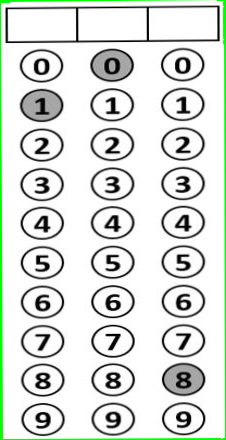

In [512]:
paper = four_point_transform(image, docCnt.reshape(4, 2))
cv2_imshow(paper)

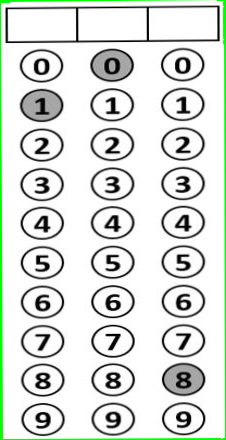

In [513]:
paper_test=paper.copy()
cv2_imshow(paper_test)

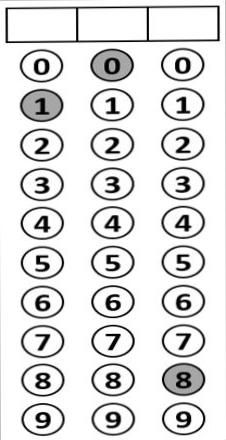

In [514]:
warped = four_point_transform(gray, docCnt.reshape(4, 2))
cv2_imshow(warped)

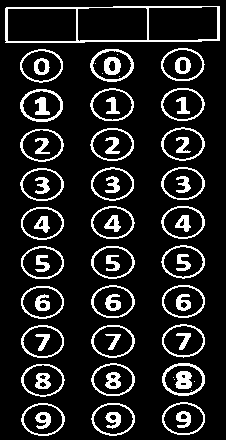

In [515]:
thresh = cv2.threshold(warped, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cv2_imshow(thresh)

In [516]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)


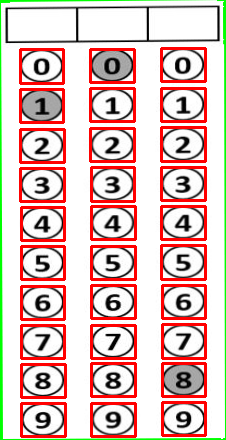

In [517]:
# Inisialisasi daftar kontur yang mewakili pertanyaan.
questionCnts = []
cont_list_before = []
cont_list_after = []
# Melakukan loop pada setiap kontur yang ditemukan.
for c in cnts:
    # Menghitung bounding box dari setiap kontur.
    (x, y, w, h) = cv2.boundingRect(c)

    # Menghitung aspect ratio dari bounding box.
    ar = w / float(h)
    cont_list_before.append((x, y, w, h, ar))
    # Memeriksa apakah kontur tersebut memenuhi kriteria untuk menjadi kotak pertanyaan.
    # Kriteria: cukup lebar, cukup tinggi, dan memiliki aspect ratio yang mendekati 1.
    if ar >= 0.9 and ar <= 1.5:
        cont_list_after.append((x, y, w, h, ar))
        # Menggambar kotak pertanyaan pada gambar asli
        cv2.rectangle(paper, (x, y), (x + w, y + h), (0, 0, 255), 2)
        # Menambahkan kontur yang memenuhi kriteria ke dalam daftar 'questionCnts'.
        questionCnts.append(c)

cv2_imshow(paper)

In [518]:
df_cont_before = pd.DataFrame(cont_list_before, columns=['X', 'Y', 'Width', 'Height', 'Aspect Ratio'])
df_cont_before

,X,Y,Width,Height,Aspect Ratio
0,91,403,44,33,1.333333
1,21,403,44,33,1.333333
2,162,402,43,33,1.303030
3,21,364,44,33,1.333333
4,162,363,43,33,1.303030
5,91,363,44,33,1.333333
6,91,325,44,33,1.333333
7,21,325,43,33,1.303030
8,162,324,43,34,1.264706
9,21,286,43,33,1.303030


In [519]:
df_cont_after = pd.DataFrame(cont_list_after, columns=['X', 'Y', 'Width', 'Height', 'Aspect Ratio'])
df_cont_after

,X,Y,Width,Height,Aspect Ratio
0,91,403,44,33,1.333333
1,21,403,44,33,1.333333
2,162,402,43,33,1.303030
3,21,364,44,33,1.333333
4,162,363,43,33,1.303030
5,91,363,44,33,1.333333
6,91,325,44,33,1.333333
7,21,325,43,33,1.303030
8,162,324,43,34,1.264706
9,21,286,43,33,1.303030


In [520]:
unique_values_X = df_cont_after['X'].unique()
unique_values_Y = df_cont_after['Y'].unique()

print(unique_values_X)
print(unique_values_Y)

[ 91  21 162 161  20  90]
[403 402 364 363 325 324 286 285 246 245 207 206 168 167 129 128 127  89
  88  49  48]


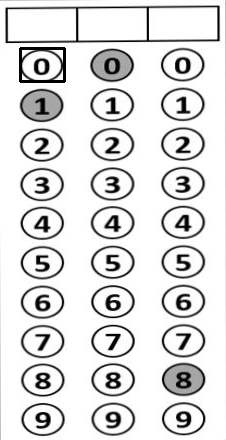

In [521]:
x_1=20
y_1=48
w_1=44
h_1=33
test_kotak=cv2.rectangle(warped.copy(), (x_1, y_1), (x_1 + w_1, y_1 + h_1), (0, 0, 255), 2)
cv2_imshow(test_kotak)

In [522]:
from imutils import contours
questionCnts = contours.sort_contours(questionCnts,
	method="top-to-bottom")[0]

In [523]:
# Inisialisasi list untuk menyimpan string kontur
contour_strings_bulat = []
# Ubah setiap kontur menjadi string dan tambahkan ke list
for con_bulat in questionCnts:
    contour_str_bulat = str(con_bulat.squeeze().tolist())
    contour_strings_bulat.append(contour_str_bulat)
# Buat DataFrame dari list kontur
df_kontur_bulat = pd.DataFrame(contour_strings_bulat, columns=['Contour'])
# Tampilkan DataFrame
df_kontur_bulat

,Contour
0,"[[178, 48], [177, 49], [174, 49], [173, 50], [..."
1,"[[105, 49], [104, 50], [102, 50], [101, 51], [..."
2,"[[38, 49], [37, 50], [34, 50], [33, 51], [31, ..."
3,"[[177, 88], [176, 89], [173, 89], [172, 90], [..."
4,"[[109, 88], [108, 89], [104, 89], [103, 90], [..."
5,"[[36, 89], [35, 90], [33, 90], [32, 91], [30, ..."
6,"[[181, 127], [180, 128], [175, 128], [174, 129..."
7,"[[107, 128], [106, 129], [103, 129], [102, 130..."
8,"[[35, 129], [34, 130], [32, 130], [31, 131], [..."
9,"[[178, 167], [177, 168], [174, 168], [173, 169..."


In [524]:
len(questionCnts)

30

In [525]:
cont_list_end = []
# Melakukan loop pada setiap kontur yang ditemukan.
for c in questionCnts:
    # Menghitung bounding box dari setiap kontur.
    (x, y, w, h) = cv2.boundingRect(c)

    # Menghitung aspect ratio dari bounding box.
    ar = w / float(h)
    cont_list_end.append((x, y, w, h, ar))

df_cont_end = pd.DataFrame(cont_list_end, columns=['X', 'Y', 'Width', 'Height', 'Aspect Ratio'])
df_cont_end

,X,Y,Width,Height,Aspect Ratio
0,161,48,44,33,1.333333
1,90,49,44,33,1.333333
2,20,49,43,34,1.264706
3,161,88,44,33,1.333333
4,90,88,44,33,1.333333
5,20,89,43,33,1.303030
6,161,127,44,34,1.294118
7,90,128,44,33,1.333333
8,20,129,44,33,1.333333
9,161,167,44,33,1.333333


In [526]:
nomor=0
df_select=df_cont_end[nomor:nomor + 3]
df_select.sort_values(by='X')

,X,Y,Width,Height,Aspect Ratio
2,20,49,43,34,1.264706
1,90,49,44,33,1.333333
0,161,48,44,33,1.333333


In [527]:
hasil=[]
for (q, i) in enumerate(np.arange(0, len(questionCnts), 3)):

    cnts = contours.sort_contours(questionCnts[i:i + 3])[0]
    bubbled = None

    # loop over the sorted contours
    for (j, c) in enumerate(cnts):
        mask = np.zeros(thresh.shape, dtype="uint8")
        cv2.drawContours(mask, [c], -1, 255, -1)
        mask = cv2.bitwise_and(thresh, thresh, mask=mask)
        total = cv2.countNonZero(mask)
        if total > 450:
          hasil.append((j,q))
          cv2.drawContours(paper_test, [cnts[j]], -1, (0, 255, 0), 3)



array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [238, 246, 238],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  8, 255,   8],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  8, 255,   8],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  8, 255,   8],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]], dtype=uint8)
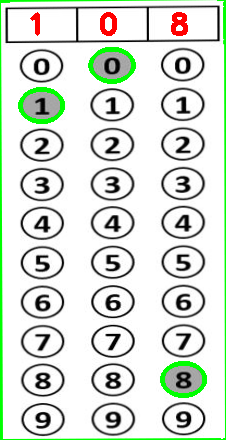

In [528]:
hasil.sort()
cv2.putText(paper_test, "{}".format(hasil[0][1]), (27, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 3)
cv2.putText(paper_test, "{}".format(hasil[1][1]), (99, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 3)
cv2.putText(paper_test, "{}".format(hasil[2][1]), (170, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 3)